In [4]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

In [7]:
  V, E = mesh.load_raw('data/ForwardDesign/sleeve2.obj')
  fusedPts = list(np.loadtxt('data/ForwardDesign/fuse_sleeve.txt').reshape((-1, 2)))
  holePts = []  # or load from file if you want, but it should be empty

In [8]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

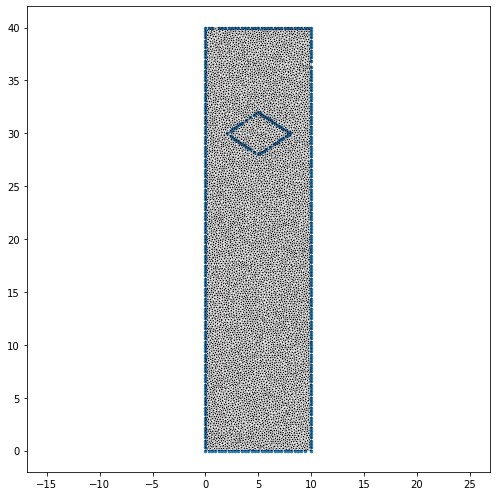

In [9]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

viewer = Viewer(isheet, wireframe=True)
viewer.show()

In [11]:
import time
import benchmark
import py_newton_optimizer

benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

# If you want to see the inflation progress in the viewer:
framerate = 5  # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.00220895	1
Newton iterations	0.00438309	1
    InflatableSheet energy	0.000914812	1
    Newton iterate	0.00253701	1
        Preamble	0.00253415	1
            Callback	0.000346899	1
            InflatableSheet energy	0.000661135	1
            InflatableSheet gradient	0.00134492	1
Full time	0.0232229


In [12]:
from tri_mesh_viewer import TriMeshViewer as Viewer
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

Step-by-step: Save Inflation Video

In [15]:
#Create the InflatableSheet and the Offscreen Viewer:
from tri_mesh_viewer import OffscreenTriMeshViewer
isheet = inflation.InflatableSheet(m, iwv)  # or use np.array(iwv) != 0 if needed
oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)

In [16]:
#Set up the optimizer and start recording
import benchmark
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # or your preferred number of iterations

benchmark.reset()
oview.recordStart('sleeve.mp4')  # Output video filename
isheet.pressure = 1  # Adjust pressure as needed

In [17]:
#Run the simulation and update the viewer:
cr = inflation.inflation_newton(
    isheet,
    isheet.rigidMotionPinVars,
    opts,
    callback=lambda it: oview.update()
)
benchmark.report()
oview.recordStop()

InflatableSheet setVars	0.008219	1
Newton iterations	70.9668	1
    InflatableSheet energy	0.001086	1
    Newton iterate	70.9647	88
        Backtracking	0.553132	87
            InflatableSheet energy	0.103936	142
            InflatableSheet setVars	0.439272	142
        Compute descent direction	57.0584	87
            newton_step	57.0576	87
                Newton solve	54.8364	144
                    CHOLMOD Numeric Factorize	53.0732	143
                    Solve	1.16694	88
                        CHOLMOD Backsub	0.908721	87
                        CHOLMOD Numeric Factorize	0.047524	1
                        CHOLMOD Symbolic Factorize	0.196526	1
                hessEval	2.10511	87
                largestMagnitudeEigenvalue	0.0576019	3
        Preamble	13.3136	88
            Callback	13.1292	88
            InflatableSheet energy	0.056119	88
            InflatableSheet gradient	0.108438	88
Full time	72.0067
